In [525]:
import pandas as pd
datos= pd.read_csv("housing.csv")
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [526]:
datos["ocean_proximity"].value_counts() # cuantos datos hay y que caracateristicas

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [527]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [528]:
datos.describe()#describir los datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


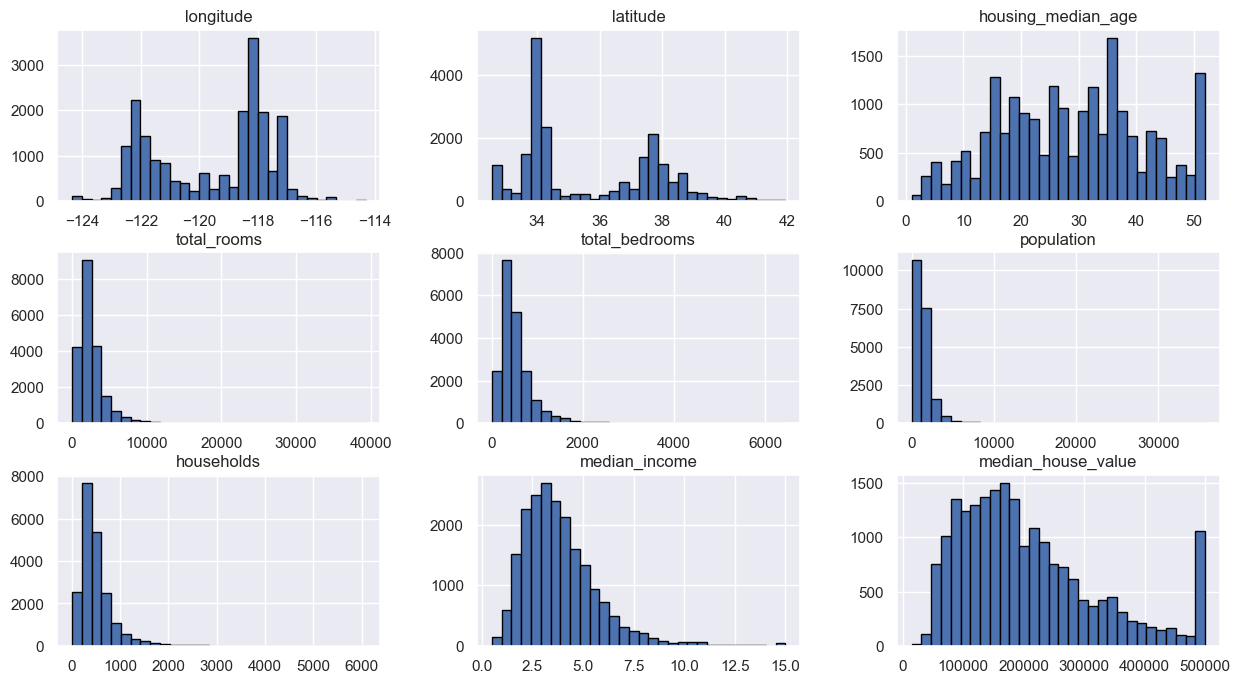

In [529]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")#muestra los datos en graficas

#Que notamos?
#hay valores que tienen puntas al finla que no son muy buenas para el modelo
#estos datos son

#housing_median_age
#median_icome
#median_house_value


#eliminar todos los registros de casas que tengan una antigüedad >= 50
datos = datos.drop(datos[datos["housing_median_age"]>=50].index)
#los que tengan el precio >= 500000
datos = datos.drop(datos[datos["median_house_value"]>=500000].index)
#los que tengan los ingresos >= 15
datos = datos.drop(datos[datos["median_income"]>=15].index)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

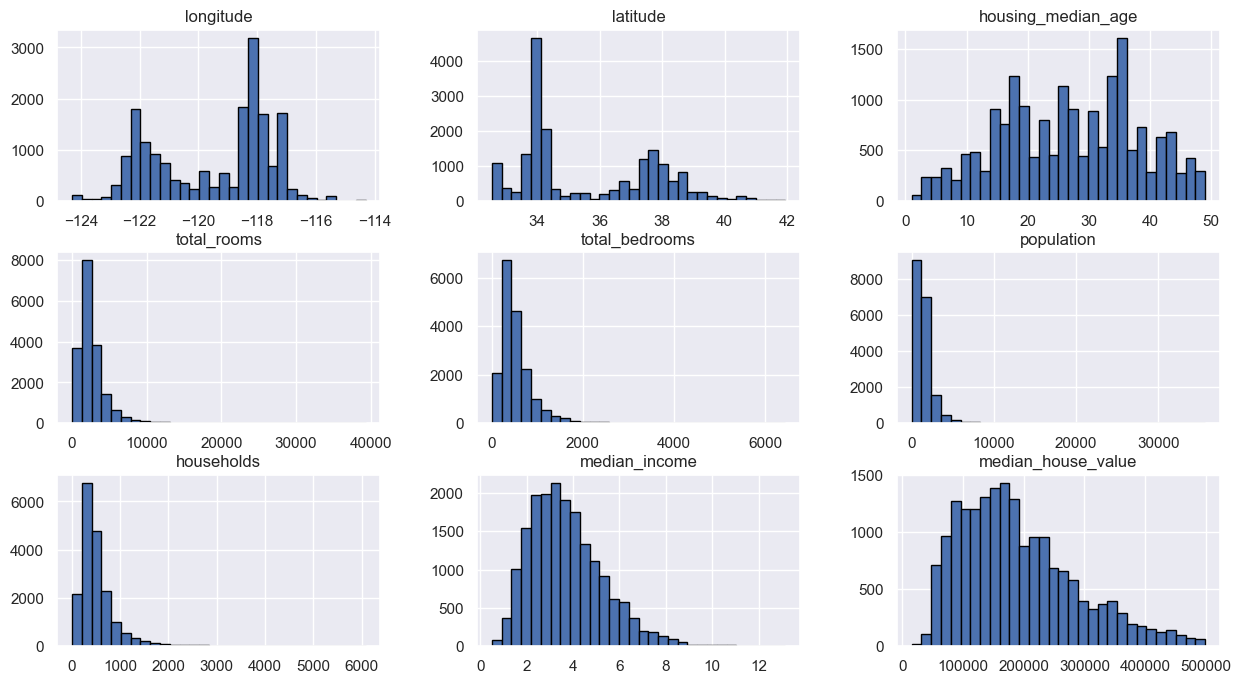

In [530]:
#vemos los datos y los picos deberian desaparecer
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

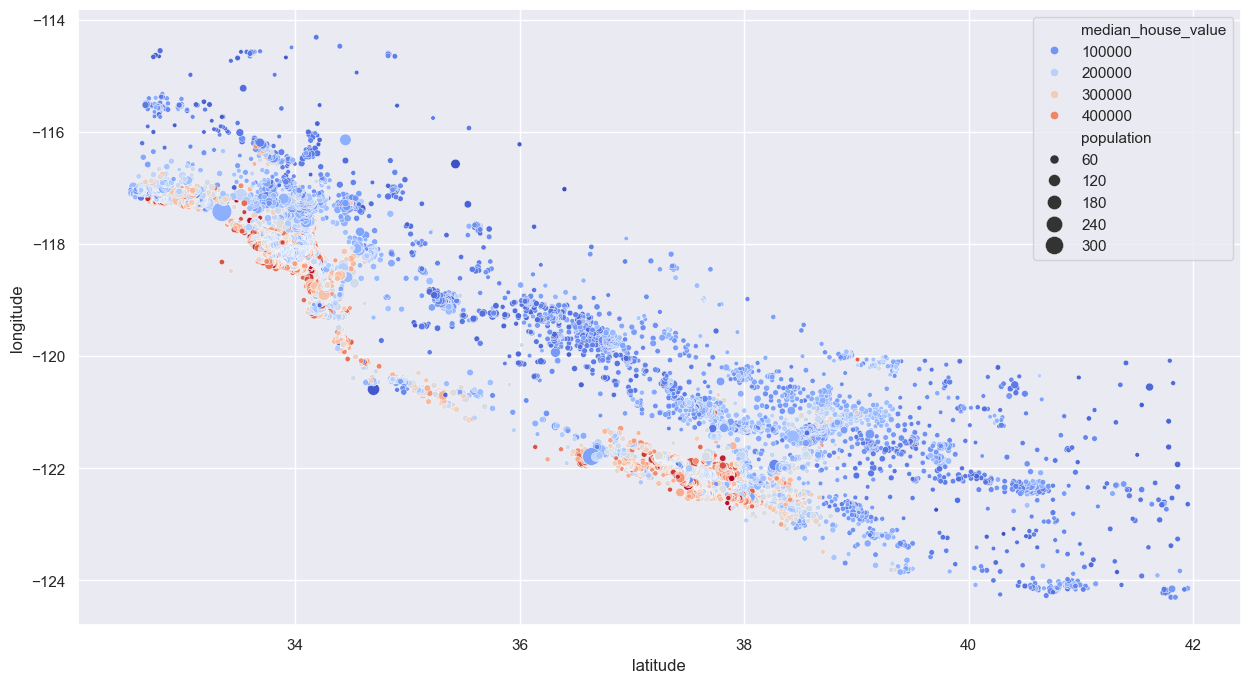

In [531]:
import seaborn as sb
# Ajusta el escalado del tamaño
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm",
               size=datos["population"]/100, sizes=(10, 200))
#entre mas rojo mas cara y entre mas grande, mas poblado

<Axes: xlabel='latitude', ylabel='longitude'>

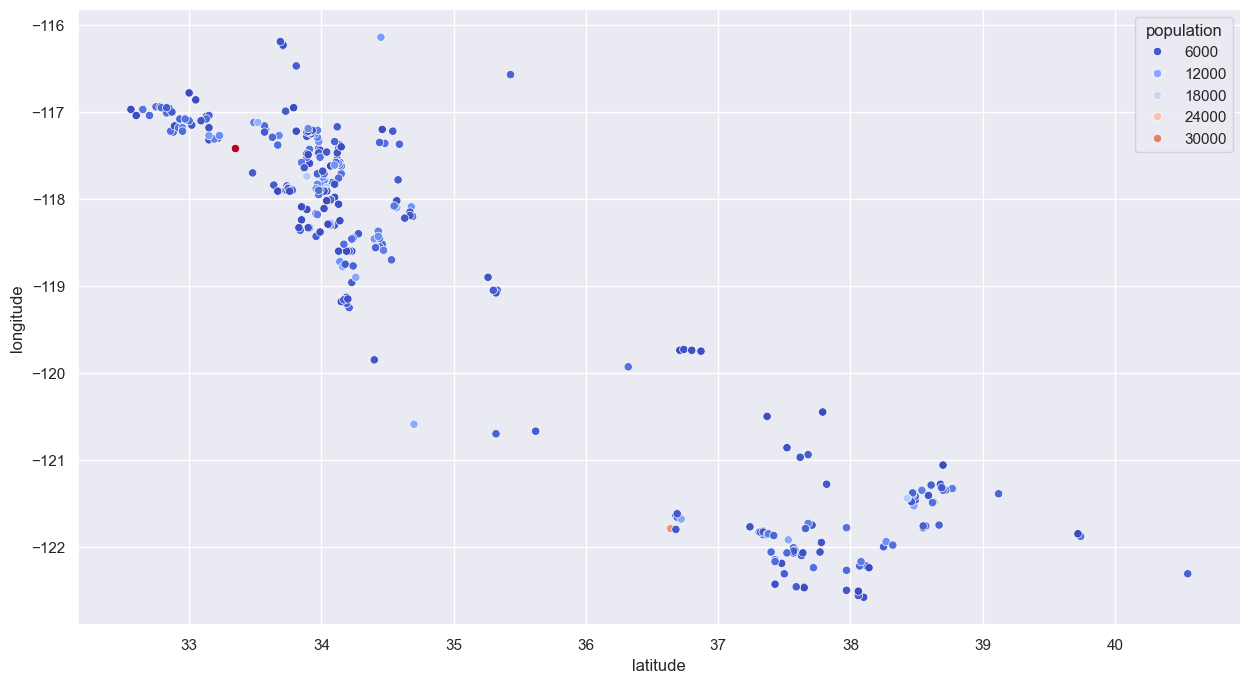

In [532]:
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.population > 5000)], hue="population", palette="coolwarm") #donde viven las personas que viven mas

In [533]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18386 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18386 non-null  float64
 1   latitude            18386 non-null  float64
 2   housing_median_age  18386 non-null  float64
 3   total_rooms         18386 non-null  float64
 4   total_bedrooms      18195 non-null  float64
 5   population          18386 non-null  float64
 6   households          18386 non-null  float64
 7   median_income       18386 non-null  float64
 8   median_house_value  18386 non-null  float64
 9   ocean_proximity     18386 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [534]:
datos_na = datos.dropna() #quita datos vacios

In [535]:
datos_na.info()#no hay datos vacios

<class 'pandas.core.frame.DataFrame'>
Index: 18195 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18195 non-null  float64
 1   latitude            18195 non-null  float64
 2   housing_median_age  18195 non-null  float64
 3   total_rooms         18195 non-null  float64
 4   total_bedrooms      18195 non-null  float64
 5   population          18195 non-null  float64
 6   households          18195 non-null  float64
 7   median_income       18195 non-null  float64
 8   median_house_value  18195 non-null  float64
 9   ocean_proximity     18195 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [536]:
#La proximidad al oceano debemos convertirla de str a int
datos_na["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
8        NEAR BAY
20       NEAR BAY
21       NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 18195, dtype: object

In [537]:
datos_na["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8165
INLAND        6252
NEAR OCEAN    2276
NEAR BAY      1500
ISLAND           2
Name: count, dtype: int64

In [538]:
#los modelos cuando estan aprendiendo podrian confundir un 1 a un 5, son numeor smuy diferentes, para eso existen dumies
#entonces para eso vamos a convertir los datos a 0 o 1, es decir:
# ISLAS   CERCA   LEJOS
#  1       0        0
#  0       1        0

#EN ESTE CASO LOS VALORES CON 0 SON LOS QUE NO ESTAN, Y LOS 1 SON LOS QUE SI ESTAN, ASI QUE EL MODELO SABRA ESTO... SIN TENER QUE PONER NUEMROS DISTINTOS ENTRE SI

dumiess = pd.get_dummies(datos_na["ocean_proximity"], dtype=int) # da un dato logico... TRUE O FALSE (BOOLEANOS), para eso especificamos en numero entero

In [539]:
#vamos a gregarle los dumis a lso datos
datos_na = datos_na.join(dumiess)

In [540]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0,0,0,1,0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY,0,0,0,1,0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY,0,0,0,1,0


In [541]:
#vamos a quitar los de letra...
datos_na = datos_na.drop(["ocean_proximity"], axis=1)#ya no estan la proximidad a los oceanos

In [542]:
#correlaciones
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.922540,-0.028554,0.034700,0.063988,0.089858,0.050350,-0.017614,-0.022945,0.287552,-0.089929,0.005713,-0.415739,0.042236
latitude,-0.922540,1.000000,-0.057572,-0.026590,-0.063897,-0.106171,-0.069717,-0.074514,-0.171720,-0.429795,0.383961,-0.010737,0.310374,-0.162727
housing_median_age,-0.028554,-0.057572,1.000000,-0.374497,-0.331323,-0.278671,-0.310592,-0.198700,0.014989,0.113976,-0.222102,0.001157,0.132736,0.037097
total_rooms,0.034700,-0.026590,-0.374497,1.000000,0.935412,0.860276,0.922459,0.223290,0.153280,-0.015975,0.027484,-0.006955,-0.002187,-0.013399
total_bedrooms,0.063988,-0.063897,-0.331323,0.935412,1.000000,0.880266,0.978774,0.021374,0.080035,0.012570,-0.012289,-0.004427,-0.006183,0.004024
population,0.089858,-0.106171,-0.278671,0.860276,0.880266,1.000000,0.910685,0.040766,0.022142,0.069823,-0.036657,-0.008007,-0.036784,-0.021515
households,0.050350,-0.069717,-0.310592,0.922459,0.978774,0.910685,1.000000,0.046059,0.099566,0.038259,-0.046025,-0.006919,0.003185,0.006123
median_income,-0.017614,-0.074514,-0.198700,0.223290,0.021374,0.040766,0.046059,1.000000,0.665109,0.184215,-0.226553,-0.008820,0.064227,-0.004842
median_house_value,-0.022945,-0.171720,0.014989,0.153280,0.080035,0.022142,0.099566,0.665109,1.000000,0.319547,-0.501849,0.019759,0.112488,0.145871
<1H OCEAN,0.287552,-0.429795,0.113976,-0.015975,0.012570,0.069823,0.038259,0.184215,0.319547,1.000000,-0.652800,-0.009460,-0.270446,-0.341158


<Axes: >

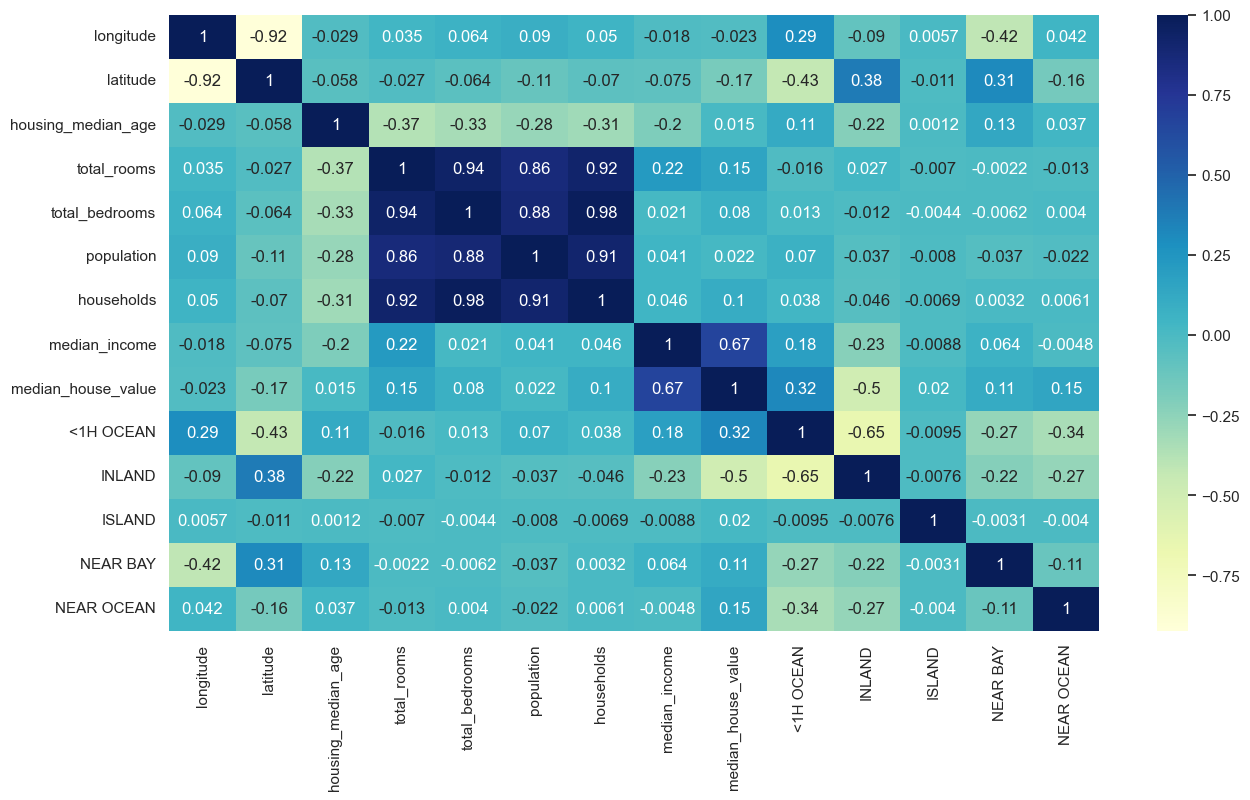

In [543]:
#correlaciones gradica
sb.set(rc={'figure.figsize': (15,8)})#tama;o
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

#tenemos que ver que numeros estan cerca de 1 y cerca de -1
#los valores ocn 1 son valores directos, muestras uno aumenta el otro igaual
#el -1 es inverso...
#el 0 no cmabia...

In [544]:
datos_na.corr()['median_house_value'].sort_values(ascending=False)
#correlaciones con todos su datos, ademas de esto.... cont odos de manera descendente

median_house_value    1.000000
median_income         0.665109
<1H OCEAN             0.319547
total_rooms           0.153280
NEAR OCEAN            0.145871
NEAR BAY              0.112488
households            0.099566
total_bedrooms        0.080035
population            0.022142
ISLAND                0.019759
housing_median_age    0.014989
longitude            -0.022945
latitude             -0.171720
INLAND               -0.501849
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

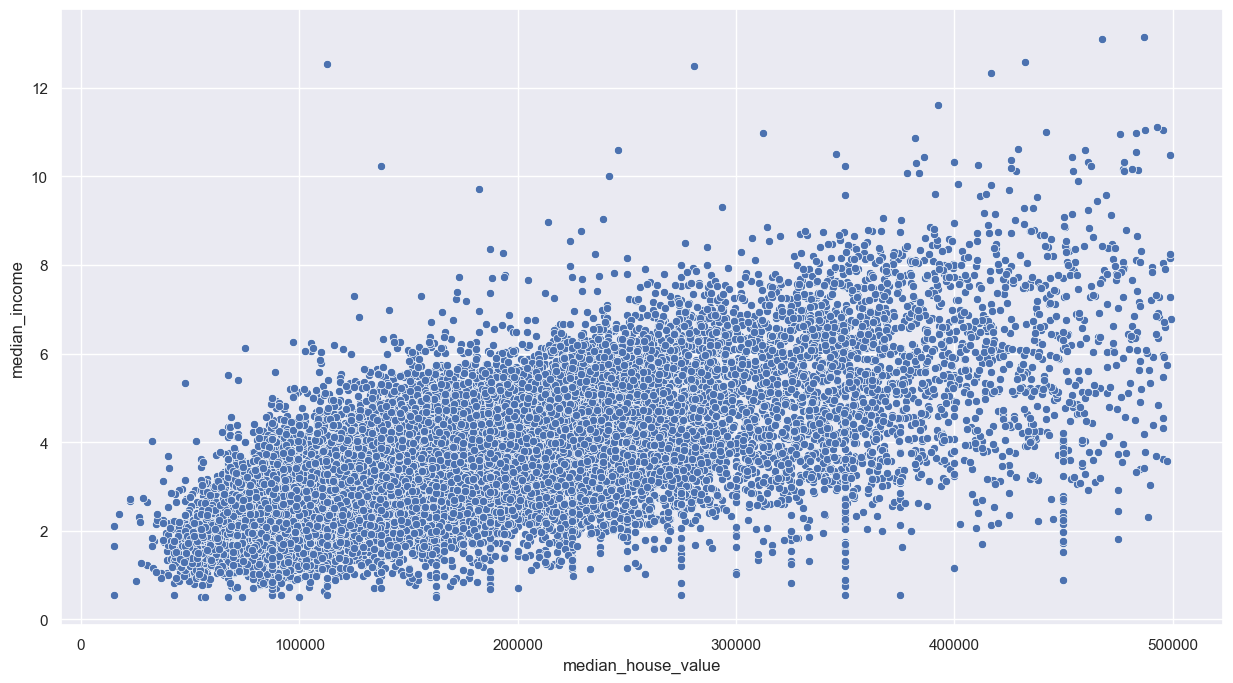

In [545]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])

In [546]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na['total_rooms'] #creamos una nueva caracteristica, es decir, total de cuartos para domir y cuartos que se usan... y asi encontrar una correlacion mayor a la casa

<Axes: >

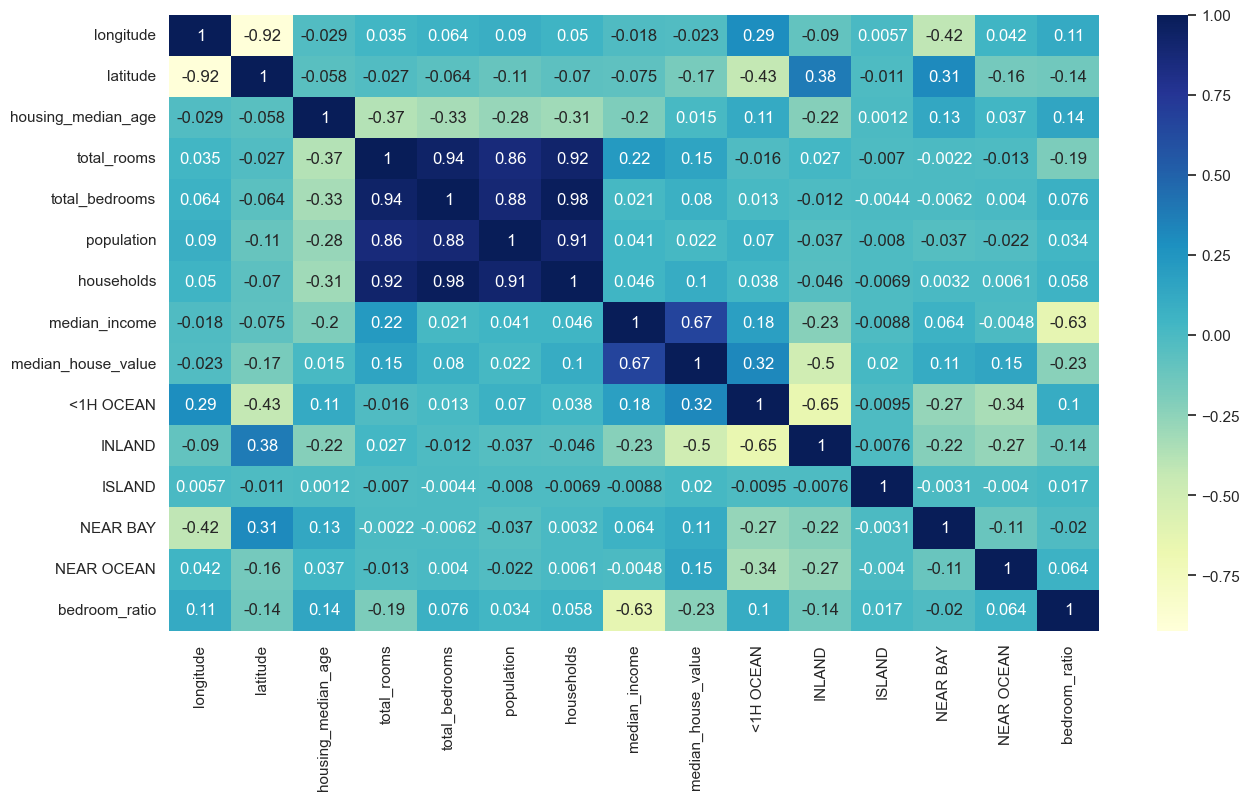

In [547]:
sb.set(rc={'figure.figsize': (15,8)})#tama;o
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [548]:
#seprar las caracterisitcas de la etiqueta
x = datos_na.drop(["median_house_value"], axis=1)
y = datos_na["median_house_value"]

In [549]:
#seprar los datos en dos partes, conjunto de entrenmiento y conjunto de pruebas
from sklearn.model_selection import train_test_split
x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(x,y, test_size=.2)
#el modelo le da mas importancia  alos nuemros grandes, por eso hay que commprimirlos
from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)
x_prueba_escalado = scaler.fit_transform(x_pruebas)


In [550]:
x_entrenamiento.shape #mirar su tama;o

(14556, 14)

In [551]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression() #modelo listo
#entrenar abajo
modelo.fit(x_entrenamiento, y_entrenamiento)

LinearRegression()

In [552]:
predicciones = modelo.predict(x_pruebas)

In [553]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_pruebas, predicciones)
mse #diferencias de error promedio elevado al cuadrado
#raiz cuadrado de diferencia de error
rmse = np.sqrt(mse)

comparativa = {"prediccion": predicciones, "valor Real": y_pruebas, "Diferencia": rmse}
pd.DataFrame(comparativa)

,prediccion,valor Real,Diferencia
7938,266251.217965,234900.0,58360.52639
8955,224327.383552,314500.0,58360.52639
18985,30596.062796,81300.0,58360.52639
2442,76392.705998,65100.0,58360.52639
12157,75132.679066,145800.0,58360.52639
...,...,...,...
18854,93769.986401,128800.0,58360.52639
2282,121130.149504,68300.0,58360.52639
2745,122030.564973,73600.0,58360.52639
14947,229603.736374,175300.0,58360.52639


In [554]:
print(modelo.score(x_entrenamiento, y_entrenamiento))
print(modelo.score(x_pruebas, y_pruebas))

0.6339915929984021
0.6362553825793393


In [555]:
#el modelo le da mas importancia  alos nuemros grandes, por eso hay que commprimirlos
from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_entrenamiento_escalado = scaler.fit_transform(x_entrenamiento)
x_prueba_escalado = scaler.fit_transform(x_pruebas)

In [556]:
pd.DataFrame(x_entrenamiento_escalado) #datos super omprimidos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.794907,-0.862915,0.468035,0.107388,0.650921,3.121715,0.871672,0.007967,1.100065,-0.721145,-0.008289,-0.299201,-0.374812,1.278166
1,-0.501076,1.199437,-0.949031,0.684019,0.530605,0.027808,0.471028,-0.844860,-0.909037,1.386684,-0.008289,-0.299201,-0.374812,-0.520447
2,0.703783,-0.788260,1.265135,-0.828801,-0.892371,-0.756841,-0.850840,0.019099,1.100065,-0.721145,-0.008289,-0.299201,-0.374812,-0.266553
3,0.673409,-0.676277,-0.949031,0.392800,0.623156,0.018354,0.690489,0.776926,1.100065,-0.721145,-0.008289,-0.299201,-0.374812,0.295021
4,0.607597,-0.764930,0.999435,-0.614407,-0.540676,-0.346899,-0.580341,-1.353064,1.100065,-0.721145,-0.008289,-0.299201,-0.374812,0.511941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,-0.713698,1.204103,-1.657564,-0.295048,-0.381025,-0.415652,-0.378744,0.197456,-0.909037,1.386684,-0.008289,-0.299201,-0.374812,-0.417047
14552,0.769595,-0.774262,-1.214731,-0.168645,0.093300,0.476424,0.118871,-0.361094,1.100065,-0.721145,-0.008289,-0.299201,-0.374812,0.766428
14553,-0.192267,0.578865,-0.949031,-0.374106,-0.642482,-0.512766,-0.577790,1.175991,-0.909037,1.386684,-0.008289,-0.299201,-0.374812,-1.192240
14554,-1.174379,0.970806,-0.417631,5.364963,3.836999,4.477018,4.388147,1.457154,-0.909037,1.386684,-0.008289,-0.299201,-0.374812,-1.149088
